# Mapillary demo

<span style="color:red;">Note:</span> Please ensure that you have set up the `MAPILLARY_TOKEN` environment variable (cf. README.md).

In [1]:
# --------------------------------------
import mapillary.interface as mly

# --------------------------------------
import numpy as np

# --------------------------------------
from PIL import Image

# --------------------------------------
from matplotlib import pyplot as plt

# --------------------------------------
import streetscapes.functions as ssf
import streetscapes.types as sst
from streetscapes import conf

# Setup

In [2]:
# Image resolution (only used for Mapillary)
resolution = 2048  # Or 1024

# Coordinates
lat = 52.0
lon = 5.25

# Destination directory
directory = ssf.mkdir(conf.OUTPUT_DIR / f"images")

# Source map
source = sst.SourceMap.Mapillary

# Mapillary token setup
mly.set_token(conf.MAPILLARY_TOKEN)

{'token': 'SUCCESS'}

Extract a feature set for a certain longitude and latitude

In [3]:
# Get image points close to in the given coordinates
data = mly.get_image_close_to(longitude=lon, latitude=lat).to_dict()

Show the extracted features

In [4]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [5.2504777908325195, 51.9987406594517]},
   'properties': {'captured_at': 1561196441000,
    'compass_angle': 180.0,
    'creator_id': 100395682205448,
    'id': 1423941337968510,
    'is_pano': False,
    'sequence_id': 'x6VtPCWN2G3MCQTW0G49Rw'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [5.233166813850403, 52.0012440803406]},
   'properties': {'captured_at': 1657882793000,
    'compass_angle': 121.1101144924832,
    'creator_id': 102518778654933,
    'id': 3246195588958192,
    'is_pano': False,
    'sequence_id': 'tAHgSGEZejaU4WM8s3FVym'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [5.2387672662734985, 51.99932524387694]},
   'properties': {'captured_at': 1657882873000,
    'compass_angle': 118.01783854271241,
    'creator_id': 102518778654933,
    'id': 1371480300014061,
    'is_pano': False,
    'sequen

Check if there are any features in the data for that location and if yes, extract the Image ID for the first feature.

In [5]:
if len(data["features"]) == 0:
    raise KeyError(f"No images found for coordinates {lat}/{lon}")

image_id = data["features"][0]['properties']['id']

Get the URL of the image as a thumbnail (the default resolution is 1024)

In [6]:
image_path = ssf.download_image(image_id, directory, source, resolution)

Streetscapes | 2024-11-20@15:53:50 | Downloading image 1423941337968510.jpeg...


Display the image

(-0.5, 2047.5, 1535.5, -0.5)

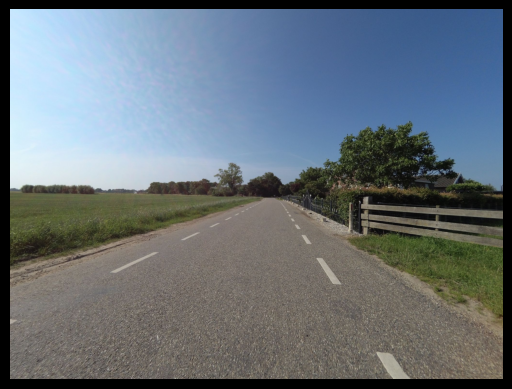

In [7]:
image = np.array(Image.open(image_path))
fig, ax = plt.subplots(1,1)
ax.imshow(image)
ax.axis('off')